In [1]:
# import python libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [3]:
# import csv file
health_df = pd.read_csv('D:\Python Data Analysis\healthcare\healthcare_dataset.csv', encoding= 'unicode_escape')

In [4]:
health_df.shape

(10000, 15)

In [5]:
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [9]:
#Modify Date of admission and discharge day column from object type into standard date format
health_df['Date of Admission'] = pd.to_datetime(health_df['Date of Admission'],format='%d/%m/%Y')
# check the format of your date.

In [10]:
health_df['Discharge Date'] = pd.to_datetime(health_df['Discharge Date'], format='%d/%m/%Y')

In [11]:
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                10000 non-null  object        
 1   Age                 10000 non-null  int64         
 2   Gender              10000 non-null  object        
 3   Blood Type          10000 non-null  object        
 4   Medical Condition   10000 non-null  object        
 5   Date of Admission   10000 non-null  datetime64[ns]
 6   Doctor              10000 non-null  object        
 7   Hospital            10000 non-null  object        
 8   Insurance Provider  10000 non-null  object        
 9   Billing Amount      10000 non-null  float64       
 10  Room Number         10000 non-null  int64         
 11  Admission Type      10000 non-null  object        
 12  Discharge Date      10000 non-null  datetime64[ns]
 13  Medication          10000 non-null  object     

Here, we can see the Date of admission and Discharge date changed to datetime data format

In [12]:
health_df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.98336,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.06485,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.89700,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.32209,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.34418,477,Urgent,2021-08-02,Paracetamol,Normal


In [14]:
health_df['Admission_Day']=health_df['Date of Admission'].dt.dayofweek # 0-Monday and so on

#health_df['Discharge_Day']=health_df['Discharge Date'].dt.dayofweek # 0-Monday and so on

In [18]:
#health_df = health_df.drop(columns=['Discharge_Day'])

In [19]:
health_df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Admission_Day
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.98336,146,Elective,2022-12-01,Aspirin,Inconclusive,3
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.06485,404,Emergency,2023-06-15,Lipitor,Normal,3
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.89700,292,Emergency,2019-02-08,Lipitor,Normal,2
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.32209,480,Urgent,2020-05-03,Penicillin,Abnormal,5
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.34418,477,Urgent,2021-08-02,Paracetamol,Normal,4


In [20]:
health_df['Admission_Day'].value_counts()

Admission_Day
3    1479
1    1446
0    1440
2    1434
4    1403
5    1402
6    1396
Name: count, dtype: int64

The above figure shows that the admissions are taken all seven days. However, we will further categorize this day hospital wise later

In [28]:
health_df[['Age','Billing Amount']].describe() # all the categorical values are removed

,Age,Billing Amount
count,10000.000000,10000.000000
mean,51.452200,25516.806778
std,19.588974,14067.292709
min,18.000000,1000.180837
25%,35.000000,13506.523967
50%,52.000000,25258.112565
75%,68.000000,37733.913725
max,85.000000,49995.902280


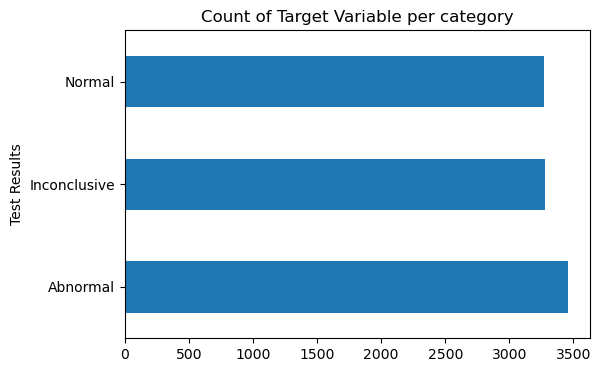

In [37]:
#count of target variable per category
health_df['Test Results'].value_counts().plot(kind='barh',figsize=(6,4))
plt.title("Count of Target Variable per category");

In [39]:
health_df['Test Results'].value_counts()

Test Results
Abnormal        3456
Inconclusive    3277
Normal          3267
Name: count, dtype: int64

### Percentage of missing value

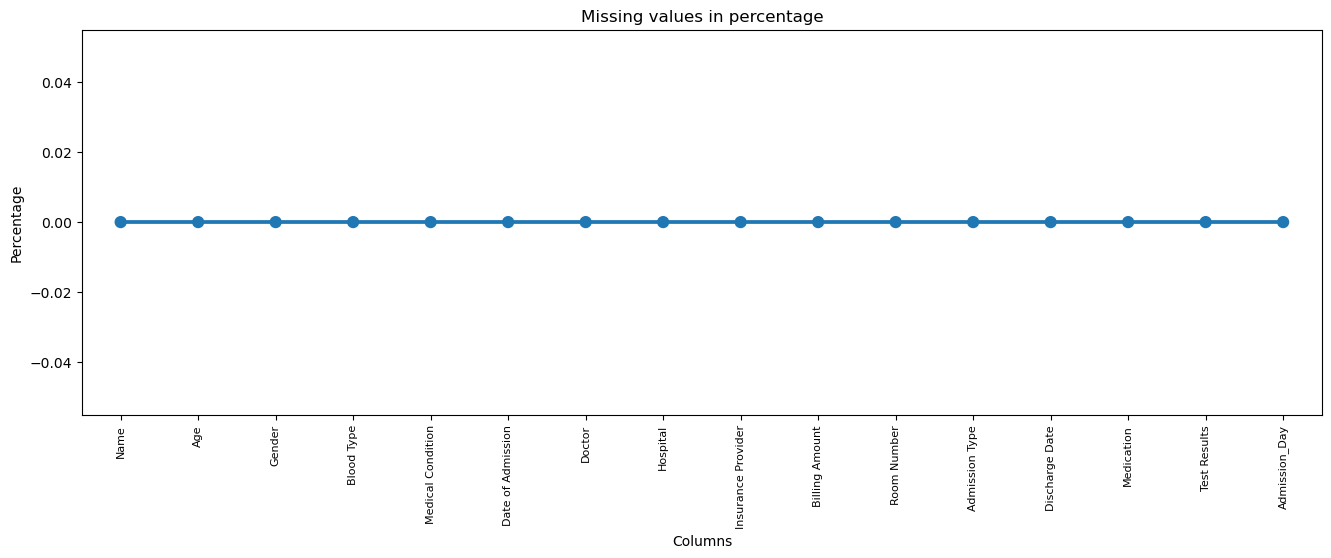

In [54]:
# Calculate the percentage of missing values for each column
missing = pd.DataFrame((health_df.isnull().sum()) * 100 / health_df.shape[0]).reset_index()
missing.columns = ['Column', 'Percentage']

# Plotting
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='Column', y='Percentage', data=missing)
plt.xticks(rotation=90, fontsize=8)  # Adjust fontsize and rotation for better readability
plt.title("Missing values in percentage")
plt.ylabel("Percentage")  # Corrected ylabel assignment
plt.xlabel("Columns")  # Added xlabel for clarity
plt.show()

Here, we don't have any missing values

### Test results

In [57]:
health_df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results', 'Admission_Day'],
      dtype='object')

In [63]:
health_df['Test Results'].value_counts()

Test Results
Abnormal        3456
Inconclusive    3277
Normal          3267
Name: count, dtype: int64

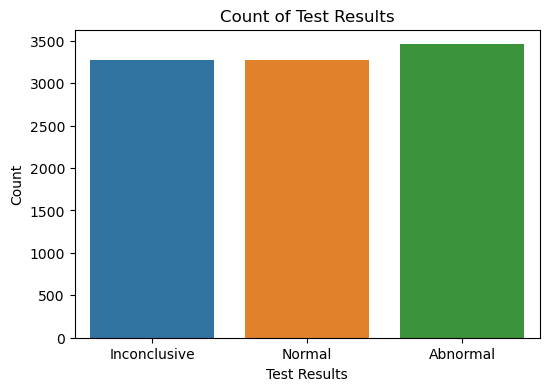

In [64]:
plt.figure(figsize=(6, 4))
sns.countplot(data=health_df, x='Test Results')
plt.title('Count of Test Results')
plt.xlabel('Test Results')
plt.ylabel('Count')
plt.show()

### Count of males and female patients

In [65]:
health_df['Gender'].value_counts()

Gender
Female    5075
Male      4925
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

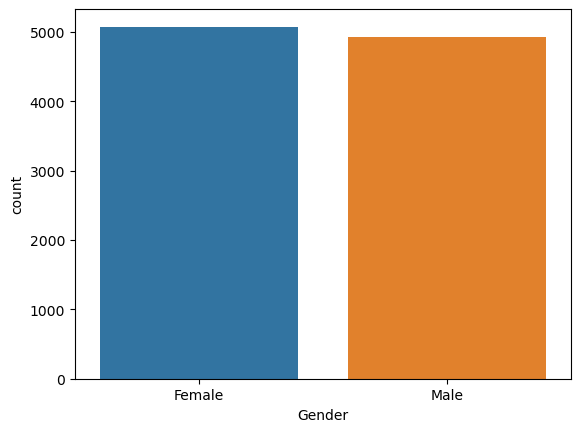

In [66]:

sns.countplot(x='Gender',data=health_df)


### Gender distribution according to the target variable

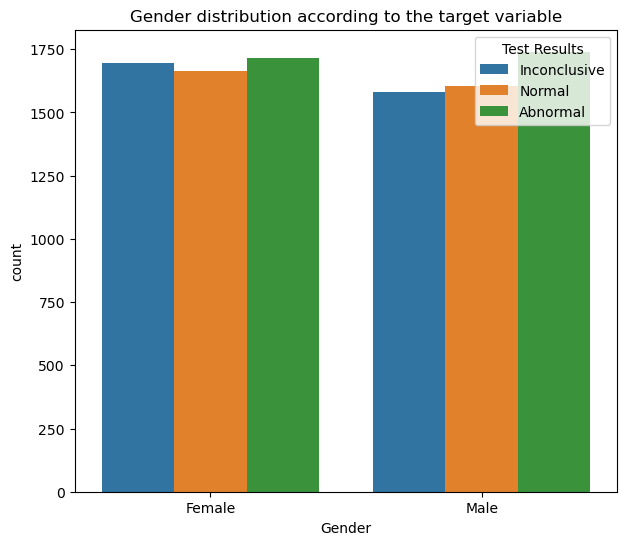

In [79]:
plt.figure(figsize=(7, 6))
sns.countplot(x='Gender', hue='Test Results',data=health_df)
plt.title('Gender distribution according to the target variable')
plt.show()

### Age distribution in the dataset

C:\Users\kiran\AppData\Local\Temp\ipykernel_14180\1008080142.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(health_df['Age'])
C:\Users\kiran\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

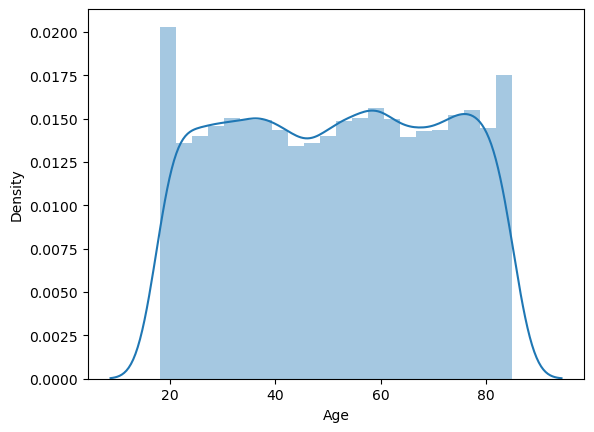

In [94]:
sns.distplot(health_df['Age'])

In [96]:
health_df['Medical Condition'].value_counts()

Medical Condition
Asthma          1708
Cancer          1703
Hypertension    1688
Arthritis       1650
Obesity         1628
Diabetes        1623
Name: count, dtype: int64

<Axes: xlabel='Medical Condition', ylabel='count'>

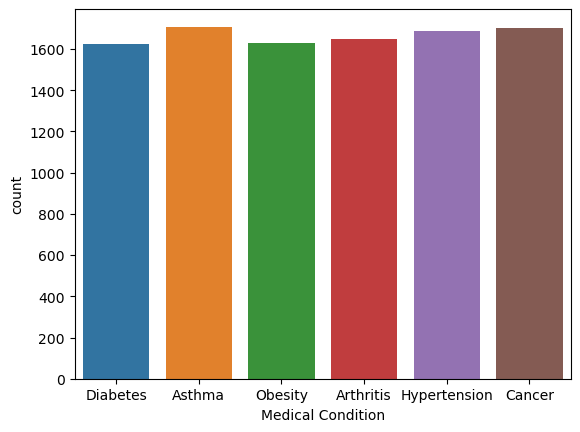

In [99]:
sns.countplot(x='Medical Condition',data=health_df)

<Axes: xlabel='Medical Condition', ylabel='count'>

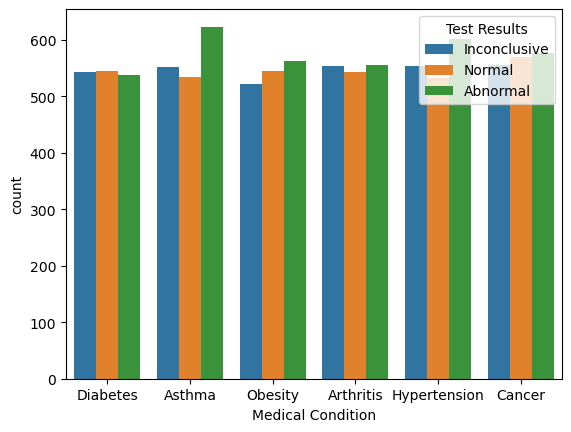

In [101]:
sns.countplot(x='Medical Condition',hue='Test Results',data=health_df)

The graph above shows that the patients with all the medical conditions have all three kind of test results

Hospital
Smith PLC                        19
Smith and Sons                   17
Smith Ltd                        14
Smith Inc                        14
Johnson PLC                      13
                                 ..
Daniel-Benton                     1
Franco, Hicks and Anderson        1
Berry PLC                         1
Martinez, Johnson and Carlson     1
Torres, Young and Stewart         1
Name: count, Length: 8639, dtype: int64

In [106]:
Total_hospitals = health_df['Hospital'].nunique()

In [107]:
print(Total_hospitals)

8639


### which is the most popular insurance provider

In [108]:
health_df['Insurance Provider'].value_counts()

Insurance Provider
Cigna               2040
Blue Cross          2032
Aetna               2025
UnitedHealthcare    1978
Medicare            1925
Name: count, dtype: int64

Almost all the insurance providers have same number of clients.

In [109]:
health_df['Admission Type'].value_counts()

Admission Type
Urgent       3391
Emergency    3367
Elective     3242
Name: count, dtype: int64

<Axes: xlabel='Admission Type', ylabel='count'>

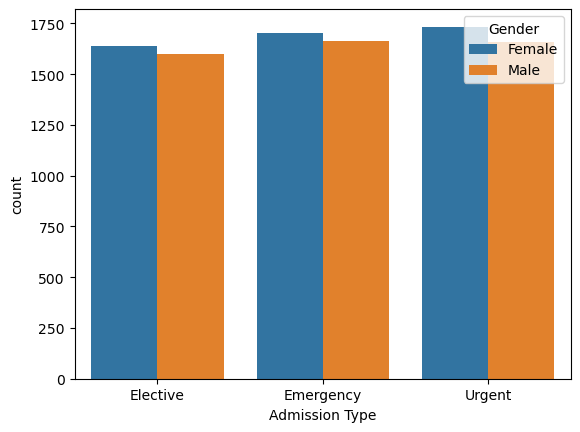

In [110]:
sns.countplot(x='Admission Type',hue='Gender',data=health_df)

In [ ]:
Conclusion: since this is the dummy data and is equally distributed, no any exciting insights were extracted to share